In [2]:
import torch
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from config import *
from data.util import crop_q_between, count_points_between

In [19]:
READ_START_DATE = datetime.strptime(CONFIG['READ_START_DATE'], DATE_FORMAT)
READ_END_DATE = datetime.strptime(CONFIG['READ_END_DATE'], DATE_FORMAT)

# One week Monday - Monday
PLOT_START_DATE = datetime(2021, 6, 7)
PLOT_END_DATE = datetime(2021, 6, 14)

SECTION_INDEX = 4

In [23]:
mat_q = torch.load(out_path('mat_q.pt'))
# mat_q = mat_q[:, SECTION_INDEX]
mat_q = crop_q_between(mat_q, READ_START_DATE, READ_END_DATE, PLOT_START_DATE, PLOT_END_DATE)
mat_q.shape

torch.Size([672, 472])

Plot the week

/tmp/ipykernel_16480/641690600.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


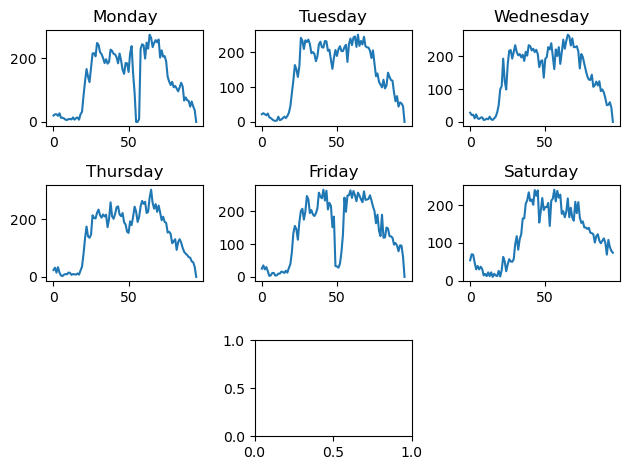

In [29]:
SECTION_INDEX = 9
x = torch.arange(0, count_points_between(PLOT_START_DATE, PLOT_START_DATE + timedelta(days=1)))

fig, axes = plt.subplots(3, 3)
fig.delaxes(axes[2, 0])
fig.delaxes(axes[2, 2])

for day in range(7):
    plot_date = PLOT_START_DATE + timedelta(days=day)
    day_q = crop_q_between(mat_q[:, SECTION_INDEX],
                           PLOT_START_DATE, PLOT_END_DATE,
                           plot_date, plot_date + timedelta(days=1))
    axis = axes[day // 3, 1 if day == 7 else (day % 3)]
    axis.set(title=plot_date.strftime('%A'))
    axis.plot(day_q)

fig.tight_layout()
fig.show()
    

In [21]:
import calendar
calendar.firstweekday()

0